In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math 

In [73]:
S = 500 #размерность матрицы    
L = 10 # длина ящика для нулевых краевых условий
dx = L/(S+2)
x = np.linspace(-L/2+dx, L/2-dx, S) # список xi от -L/2+dx до L/2-dx
k = 1/(2*dx**2)
dx
# параметры графика
width = 8
high = 6

0.0199203187250996

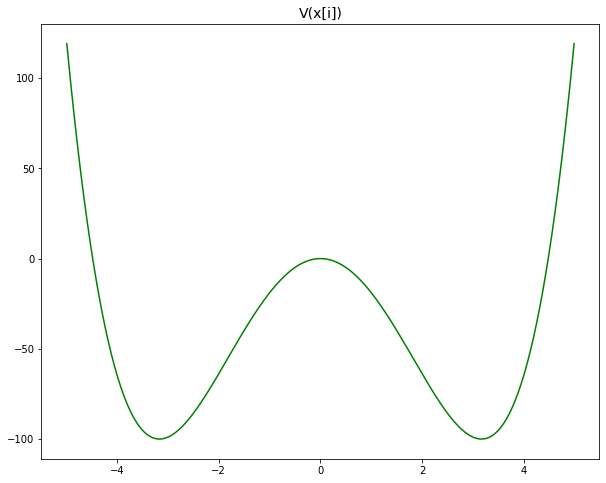

In [108]:
alpha, beta = -2*L, 1
def V(coor):
    return alpha*x**2 + beta*x**4 
v = V(x)#*2*dx**2
plt.figure(figsize=(width, high))
plt.plot(x, v, color="green", label="V(x)")      
#plt.legend()
plt.title("V(x[i])",size = 14)
plt.show()

In [81]:
# построение матрицы Гамильтона
h = np.zeros((S,S))
for i in range(S-1):
    h[i+1][i] = -1*k
    h[i][i+1] = -1*k
for i in range(S):
    h[i][i] = 2*k + v[i]

In [82]:
eigvals, eigvecs = np.linalg.eigh(h)

In [83]:
eigvals[0]

-95.54530694185588

In [111]:
# построение зависимости энергии от номера уровня
# зависимость для всех уровней (необрезанная) довольно кривая
plt.figure(figsize=(width, high))
plt.plot(eigvals,'o')
plt.xlabel("n")
plt.ylabel("En")
plt.title("All energies",size = 14)
plt.show()

NameError: name 'width' is not defined

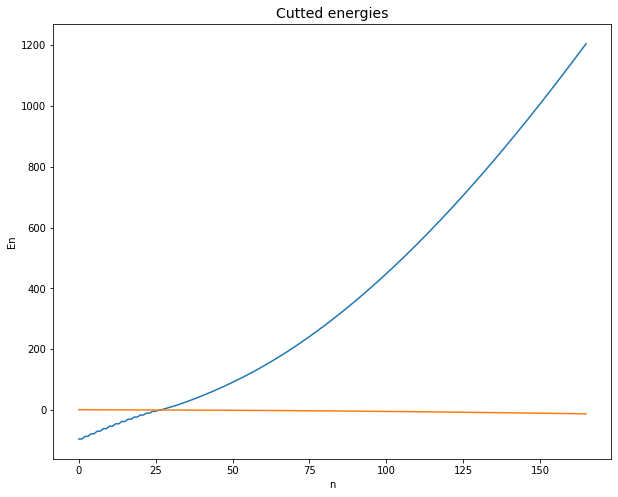

In [110]:
# построение зависимости энергии от номера уровня
n = int(S/3) #номер последнего уровня
plt.figure(figsize=(10,8))
plt.plot(eigvals[:n])
plt.plot(eigvals[:n]/eigvals[0]) #нормируем каждый уровень на первый
plt.xlabel("n")
plt.ylabel("En")
plt.title("Cutted energies",size = 14)
plt.show()
 

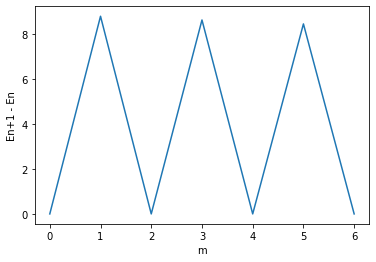

In [89]:
# посмотрим, как изменяется приращение энергии
# скорее всего, на характер графика повлияла вырожденность уровней
m = int(n/20)
vals =  eigvals[:m]
dist = [vals[i+1]-vals[i] for i in range(m-1)]
#dist
plt.plot(dist)
plt.xlabel("m")
plt.ylabel("En+1 - En")
plt.show()

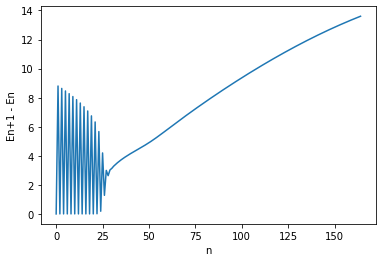

In [90]:
# посмотрим, как изменяется приращение энергии
# скорее всего, на характер графика повлияла вырожденность уровней

#тут видно область энергии без вырождения
vals =  eigvals[:n]
dist = [vals[i+1]-vals[i] for i in range(n-1)]
#dist
plt.plot(dist)
plt.xlabel("n")
plt.ylabel("En+1 - En")
plt.show()

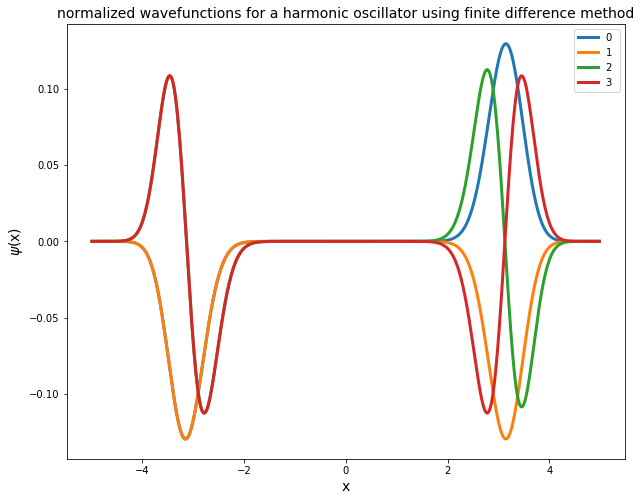

In [97]:
num = 4
plt.figure(figsize=(width, high))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x, y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()

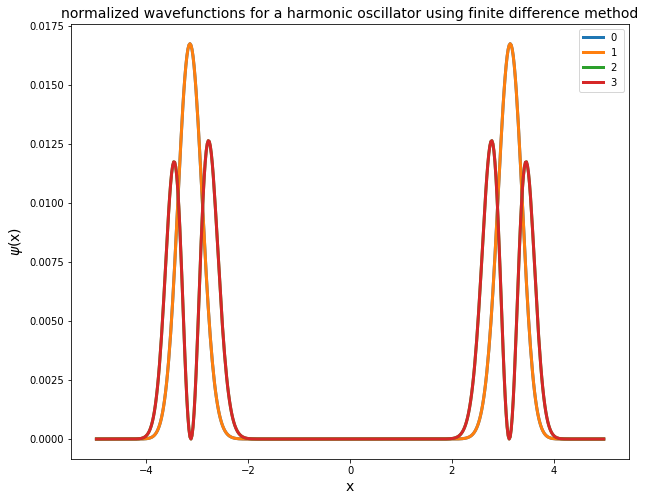

In [98]:
# несколько первых квадратов функций
plt.figure(figsize=(width, high))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x,y**2,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()

In [101]:
# волновая функция выше ямы
eigvals[50]

90.99313968886938

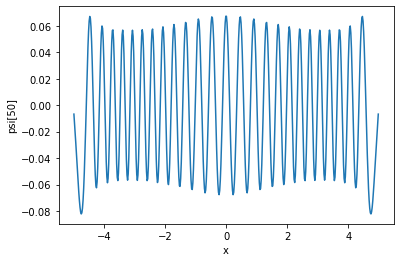

In [102]:
plt.plot(x,eigvecs[:,50])
plt.xlabel("x")
plt.ylabel("psi[50]")
plt.show()

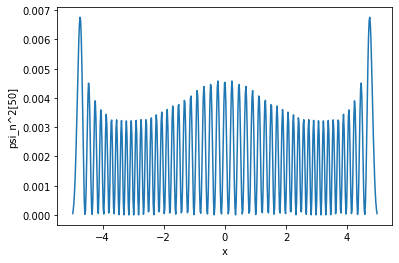

In [103]:
plt.plot(x,eigvecs[:,50]**2)#,'o')
plt.xlabel("x")
plt.ylabel("psi_n^2[50]")
plt.show()

In [104]:
# проверка нормировки
for i in range(6):
    print ("phi^2",i, "=",sum([eigvecs[j][i]**2 for j in range(S)])) # i - индекс столбца 
    #print (sum([eigvecs[i][j] for j in range(S)]))

phi^2 0 = 1.0000000000000002
phi^2 1 = 1.0000000000000004
phi^2 2 = 1.0000000000000004
phi^2 3 = 1.000000000000001
phi^2 4 = 0.9999999999999997
phi^2 5 = 0.9999999999999992
